# EDA

In [43]:
import zipfile
import os

def unzip(filename, data_directory_name):
          with zipfile.ZipFile(filename, mode="r") as archive:
             archive.extractall(data_directory_name)

if not os.path.exists("/data/recsys2022"):
    unzip("dressipi_recsys2022.zip", "data")

In [44]:
import pandas as pd

train_purchases_df = pd.read_csv("data/dressipi_recsys2022/train_purchases.csv", dtype={'session_id': str, 'item_id': str, 'date':object})
train_sessions_df = pd.read_csv("data/dressipi_recsys2022/train_sessions.csv", dtype={'session_id': str, 'item_id': str, 'date':object})
item_features_df = pd.read_csv("data/dressipi_recsys2022/item_features.csv")
candidate_items_df = pd.read_csv("data/dressipi_recsys2022/candidate_items.csv", dtype={'item_id': str})

In [45]:
train_purchases_df.head()

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114


In [46]:
train_sessions_df.head()

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211


In [47]:
item_features_df.head()

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75


In [48]:
print(candidate_items_df.head())
print(candidate_items_df.shape)
session_id='19'
print(train_sessions_df[train_sessions_df['session_id']==session_id].sort_values(by=['date']))
print(train_purchases_df[train_purchases_df['session_id']==session_id])

  item_id
0       4
1       8
2       9
3      19
4      20
(4990, 1)
   session_id item_id                     date
17         19   19896  2020-11-02 16:30:36.378
18         19   27937  2020-11-02 16:30:48.207
20         19   12804  2020-11-02 16:31:05.749
6          19   25772  2020-11-02 16:31:18.543
7          19    6341  2020-11-02 16:34:33.794
19         19   23687  2020-11-02 16:35:46.685
14         19    8316  2020-11-02 16:36:10.084
10         19    8281  2020-11-02 16:38:04.484
16         19    8813  2020-11-02 16:39:36.928
21         19    1755  2020-11-02 16:40:12.193
15         19   27638  2020-11-02 16:41:36.202
9          19   20033  2020-11-02 16:42:02.287
8          19   25555  2020-11-02 16:43:04.022
12         19    4385  2020-11-02 16:44:56.169
22         19   18936  2020-11-02 16:47:17.523
13         19    6704  2020-11-02 16:47:36.119
11         19    8268  2020-11-02 16:48:39.343
  session_id item_id                    date
3         19   12534  2020-11-02 17:16:

(0, 1]       307698
(1, 2]       174775
(2, 3]       115499
(3, 4]        82306
(4, 5]        60695
(5, 10]      153174
(10, 20]      78737
(20, 30]      17684
(30, 40]       5470
(40, 50]       2169
(50, 100]      1793
dtype: int64

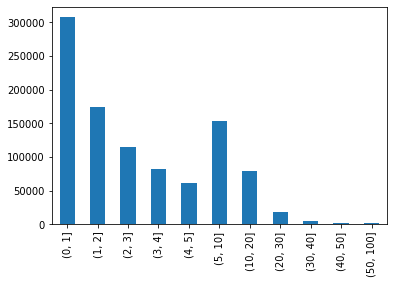

In [49]:
pd.cut(list(train_sessions_df['session_id'].value_counts()),
       bins=[0,1,2,3,4,5,10,20,30,40,50,100]).value_counts().plot(kind='bar')

pd.cut(list(train_sessions_df['session_id'].value_counts()),
       bins=[0,1,2,3,4,5,10,20,30,40,50,100]).value_counts()

In [50]:
items_per_session = train_sessions_df[['session_id', 'item_id']].groupby('session_id').count()
print(f'Average items seen during session {items_per_session.mean()}')
items_per_session

Average items seen during session item_id    4.74382
dtype: float64


,item_id
session_id,
1000004,3
1000008,3
1000016,6
1000019,1
1000024,2
...,...
999990,20
999994,5
999995,1


In [159]:
import numpy as np

def merge_purchases_sessions(session_id: int) -> pd.DataFrame:
    """
    Merges the session and purchase data for a give session_id.
    The final row of the DataFrame is always the purchase.
    Converts the 'date' column from string to np.datetime64 objects
    Sorts the DataFrame by date.

    :param session_id: The session_id for which the data is going to be collected
    :return: A pandas DataFrame object, containing the `session_id`, `item_id` and `date` (as np.datetime64) columns
    """
    session = train_sessions_df[train_sessions_df['session_id'] == session_id]
    purchase = train_purchases_df[train_purchases_df['session_id'] == session_id]

    full_session = pd.concat([session, purchase])
    full_session['date'] = full_session['date'].apply(np.datetime64)
    full_session['session_id'] = full_session['session_id'].apply(str)
    full_session['item_id'] = full_session['item_id'].apply(str)

    full_session = full_session.sort_values('date')
    return full_session
merge_purchases_sessions('19')

,session_id,item_id,date
17,19,19896,2020-11-02 16:30:36.378
18,19,27937,2020-11-02 16:30:48.207
20,19,12804,2020-11-02 16:31:05.749
6,19,25772,2020-11-02 16:31:18.543
7,19,6341,2020-11-02 16:34:33.794
19,19,23687,2020-11-02 16:35:46.685
14,19,8316,2020-11-02 16:36:10.084
10,19,8281,2020-11-02 16:38:04.484
16,19,8813,2020-11-02 16:39:36.928
21,19,1755,2020-11-02 16:40:12.193


In [67]:
test_leaderboard_sessions = pd.read_csv("data/dressipi_recsys2022/test_leaderboard_sessions.csv",  dtype={'session_id': str, 'item_id': str, 'date':object})
test_leaderboard_sessions.head()

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692


In [53]:
test_final_sessions = pd.read_csv("data/dressipi_recsys2022/test_final_sessions.csv",  dtype={'session_id': str, 'item_id': str, 'date':object})
test_final_sessions.head()

,session_id,item_id,date
0,61,27088,2021-06-01 08:12:39.664
1,96,11693,2021-06-19 17:48:05.227
2,96,18298,2021-06-19 17:49:08.589
3,96,4738,2021-06-19 17:49:15.838
4,96,495,2021-06-19 17:49:20.88


# Random Baseline

In [54]:
from itertools import product
from sklearn.utils import shuffle
import random
from sklearn.model_selection import train_test_split

_, test_df = train_test_split(train_purchases_df, test_size=0.01, random_state=42)

test_df.head()

,session_id,item_id,date
987231,4383345,19659,2020-02-13 16:37:03.226
79954,357505,2769,2020-10-25 19:50:02.073
567130,2517256,27644,2020-10-16 18:23:27.889
500891,2224118,21206,2020-03-21 22:08:23.826
55399,246261,24305,2020-02-27 21:48:54.962


In [55]:
result_df = pd.DataFrame(product(test_df['session_id'], range(0,1), range(1, 101)))
result_df.rename(columns = {0:'session_id', 1:'item_id', 2: 'rank'}, inplace = True)
item_ids = candidate_items_df['item_id']
result_df['item_id'] = result_df['item_id'].apply(lambda x: random.choice(item_ids))
result_df

,session_id,item_id,rank
0,4383345,20754,1
1,4383345,22557,2
2,4383345,15581,3
3,4383345,11668,4
4,4383345,20184,5
...,...,...,...
999995,2448146,18719,96
999996,2448146,19916,97
999997,2448146,26507,98
999998,2448146,18122,99


In [ ]:
run_baseline=False

In [56]:
from tqdm import tqdm

def mrr_at_k(test_df, results_df, k = 100):
    mrratk_score = 0
    for query_item, ground_truth, _ in tqdm(test_df.values):
        recommendations=[item_id for _, item_id, _ in results_df[results_df['session_id']==query_item].values]
        if ground_truth in recommendations:
            # identify where the item is in the list
            rank_idx = (
                np.argwhere(np.array(recommendations) == ground_truth)[0][0] + 1
            )
            # score higher-ranked ground truth higher than lower-ranked ground truth
            mrratk_score += 1 / rank_idx
    mrratk_score /= len(test_df)
    return mrratk_score

if run_baseline:
    mrr_at_k(test_df, result_df)

100%|██████████| 10000/10000 [09:00<00:00, 18.49it/s]


0.0005366803807552943

## Word2Vec

In [96]:
from gensim.models.word2vec import Word2Vec

In [59]:
full_sessions = pd.concat([train_sessions_df, train_purchases_df])

grp_by_session = list(full_sessions.sort_values(by=['date']).groupby(['session_id']))

sessions=list(map(lambda x: x[1]['item_id'].values.tolist(), grp_by_session))
sessions

[['26396', '5288', '3298', '18834'],
 ['15533', '15533', '15533', '17641'],
 ['2972', '2972', '2972', '2972', '2972', '3402', '22794'],
 ['4872', '26711'],
 ['9238', '25745', '9362'],
 ['21668', '6627'],
 ['7041', '8622', '23088', '26249', '705', '23828'],
 ['9246', '14454', '14454', '14413', '8060', '8935'],
 ['20268', '6942', '5418'],
 ['1818', '16479'],
 ['24397', '773', '19695'],
 ['21668', '2691'],
 ['20590', '24098'],
 ['26451', '5703', '19255', '19652', '196', '13670', '23654', '25632'],
 ['7412',
  '3168',
  '25705',
  '25976',
  '7395',
  '3976',
  '23421',
  '1317',
  '8753',
  '6639',
  '2386',
  '5763',
  '22239',
  '10408',
  '23898',
  '10408',
  '5365',
  '6503',
  '5963',
  '15687'],
 ['19932',
  '25227',
  '25227',
  '359',
  '17888',
  '1765',
  '6572',
  '24501',
  '5184',
  '7078',
  '14676',
  '24806',
  '24806',
  '6676',
  '4299',
  '1344',
  '17622'],
 ['23550', '10546', '9005', '6487'],
 ['7756',
  '6274',
  '2465',
  '11132',
  '8907',
  '3911',
  '9184',
  '1

In [139]:
test_item_ids=list(test_leaderboard_sessions['item_id'].unique())

In [140]:
vocab=list(sessions)
vocab.append(test_item_ids)

In [155]:
train_df, test_df = train_test_split(train_purchases_df, test_size=0.1)
train_df = train_sessions_df[train_sessions_df['session_id'].isin(list(train_df['session_id']))]

grp_by_session = list(train_df.sort_values(by=['date']).groupby(['session_id']))

sessions_train=list(map(lambda x: x[1]['item_id'].values.tolist(), grp_by_session))
sessions_train

[['26396', '5288', '3298'],
 ['15533', '15533', '15533'],
 ['4872'],
 ['9238', '25745'],
 ['21668'],
 ['7041', '8622', '23088', '26249', '705'],
 ['9246', '14454', '14454', '14413', '8060'],
 ['20268', '6942'],
 ['1818'],
 ['24397', '773'],
 ['21668'],
 ['20590'],
 ['26451', '5703', '19255', '19652', '196', '13670', '23654'],
 ['7412',
  '3168',
  '25705',
  '25976',
  '7395',
  '3976',
  '23421',
  '1317',
  '8753',
  '6639',
  '2386',
  '5763',
  '22239',
  '10408',
  '23898',
  '10408',
  '5365',
  '6503',
  '5963'],
 ['19932',
  '25227',
  '25227',
  '359',
  '17888',
  '1765',
  '6572',
  '24501',
  '5184',
  '7078',
  '14676',
  '24806',
  '24806',
  '6676',
  '4299',
  '1344'],
 ['23550', '10546', '9005'],
 ['7756',
  '6274',
  '2465',
  '11132',
  '8907',
  '3911',
  '9184',
  '1018',
  '20688',
  '22017',
  '6274'],
 ['3591', '3591', '23282'],
 ['5451'],
 ['18733', '18733'],
 ['9998', '15146'],
 ['17554'],
 ['25611',
  '23490',
  '27104',
  '648',
  '11185',
  '11515',
  '1640

In [141]:
model = Word2Vec(min_count= 1,
        epochs= 5,
        workers= 10,
        sg= 1,
        window= 4,
        seed=42,
        max_vocab_size=None)
        
model.build_vocab(sessions)


model.train(sessions_train, total_examples=model.corpus_count, epochs=model.epochs, compute_loss=True)
embeddings = model.wv

In [89]:
session_dict = dict(grp_by_session)
session_dict

{'1000004':         session_id item_id                     date
 1067945    1000004   26396  2021-05-21 20:24:02.743
 1067946    1000004    5288   2021-05-21 20:24:25.60
 1067944    1000004    3298  2021-05-21 20:25:05.741
 224384     1000004   18834  2021-05-21 20:27:24.376,
 '1000008':         session_id item_id                     date
 1067947    1000008   15533   2021-05-09 11:24:55.88
 1067948    1000008   15533  2021-05-09 11:25:21.766
 1067949    1000008   15533  2021-05-09 11:25:49.765
 224385     1000008   17641  2021-05-09 11:26:31.566,
 '1000016':         session_id item_id                     date
 1067955    1000016    2972  2020-03-28 09:37:47.782
 1067953    1000016    2972  2020-03-28 09:48:08.834
 1067952    1000016    2972  2020-03-28 12:57:38.276
 1067954    1000016    2972  2020-03-28 15:25:17.892
 1067950    1000016    2972  2020-03-28 15:25:59.938
 1067951    1000016    3402  2020-03-28 15:27:11.774
 224386     1000016   22794  2020-03-28 15:28:50.304,
 '1000019'

In [91]:
def mrr_at_k(test, embeddings, k = 100) -> float:
    """
    Mean Reciprocal Rank. 

    test must be a list of (query, ground truth) pairs
    embeddings must be a gensim.word2vec.wv thingy
    """
    mrratk_score = 0
    for query_item, ground_truth in tqdm(test):
        # get the k most similar items to the query item (computes cosine similarity)
        neighbors = embeddings.similar_by_word(query_item, topn=k)
        # clean up the list
        recommendations = [item for item, score in neighbors]
        # check if ground truth is in the recommedations
        if ground_truth in recommendations:
            # identify where the item is in the list
            rank_idx = (
                np.argwhere(np.array(recommendations) == ground_truth)[0][0] + 1
            )
            # score higher-ranked ground truth higher than lower-ranked ground truth
            mrratk_score += 1 / rank_idx

    mrratk_score /= len(test)
    return mrratk_score
    
mrr_at_k(test_df, embeddings)

  0%|          | 0/229354 [00:00<?, ?it/s]


KeyError: '26'

# Submitting Predictions top
## Predictions Format top

The task is to submit a csv that has 100 ranked predictions for each query session.

Header and columns as in the example below. Header is required. The order of rows does not matter for the evaluation system but we recommend to sort the file by session_id and rank for easier manual inspection. 
```
session_id,item_id,rank
1,100,1
1,105,2
1,107,3
...
1,101,100
2,108,1
2,107,2
...
```

In [105]:
test_sessions = list(test_leaderboard_sessions.sort_values(by=['date']).groupby(['session_id']))
test_sessions

[('100021',
       session_id item_id                     date
  5411     100021    9219  2021-06-24 07:57:21.382
  5412     100021    7926  2021-06-24 07:58:40.911
  5413     100021   21719  2021-06-24 07:58:54.328
  5414     100021   26785  2021-06-24 07:59:26.801),
 ('1000328',
        session_id item_id                     date
  51754    1000328    1152  2021-06-23 07:35:31.741
  51755    1000328    9201  2021-06-23 07:36:44.165
  51756    1000328   20536  2021-06-23 07:39:55.396),
 ('1000433',
        session_id item_id                     date
  51757    1000433   16922  2021-06-16 19:28:53.785
  51758    1000433   14881   2021-06-16 19:29:13.48
  51759    1000433   15861  2021-06-16 19:29:24.688
  51760    1000433   14881  2021-06-16 19:29:35.858
  51761    1000433    7963  2021-06-16 19:32:59.243),
 ('100050',
       session_id item_id                     date
  5415     100050    4314  2021-06-30 14:37:32.066),
 ('100053',
       session_id item_id                     date
  

In [144]:
results_fpath=f'data/recsys-dressipi.csv'
def predict_test_leaderboard_sessions(test_df, embeddings, topn=100):
    with open(results_fpath, "w") as results_file:
        results_file.write("session_id,item_id,rank\n")
        for _, df in tqdm(test_df):
            session_id=df.reset_index()['session_id'][0]
            query_item=list(df['item_id'])
            if len(query_item) == 1:
                query_item=query_item[0]
            neighbors = embeddings.similar_by_vector(query_item, topn=topn)
            recommendations = [item for item, score in neighbors]
            for rank, item_id in enumerate(recommendations):
                results_file.write(f"{session_id},{item_id},{rank+1}\n")

predict_test_leaderboard_sessions(test_sessions, embeddings)

100%|██████████| 50000/50000 [03:16<00:00, 254.99it/s]


In [ ]:
!pip freeze > requirements.txt